In [53]:
#Importing necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [54]:
#Reading the bsoten house price CSV file

housing=pd.read_csv('Housing.csv')

In [55]:
housing.head()

,CRIM,INDUS,RM,AGE,DIS,TAX,B,LSTAT,MEDV
0,0.00632,2.31,6.575,65.2,4.0900,296,396.90,4.98,24.0
1,0.02731,7.07,6.421,78.9,4.9671,242,396.90,9.14,21.6
2,0.02729,7.07,7.185,61.1,4.9671,242,392.83,4.03,34.7
3,0.03237,2.18,6.998,45.8,6.0622,222,394.63,2.94,33.4
4,0.06905,2.18,7.147,54.2,6.0622,222,396.90,5.33,36.2


In [56]:
#info of the dataset

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   INDUS   506 non-null    float64
 2   RM      506 non-null    float64
 3   AGE     506 non-null    float64
 4   DIS     506 non-null    float64
 5   TAX     506 non-null    int64  
 6   B       506 non-null    float64
 7   LSTAT   506 non-null    float64
 8   MEDV    506 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 35.7 KB


In [57]:
#description of the data

housing.describe()

,CRIM,INDUS,RM,AGE,DIS,TAX,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,6.284634,68.574901,3.795043,408.237154,356.674032,12.653063,22.532806
std,8.601545,6.860353,0.702617,28.148861,2.105710,168.537116,91.294864,7.141062,9.197104
min,0.006320,0.460000,3.561000,2.900000,1.129600,187.000000,0.320000,1.730000,5.000000
25%,0.082045,5.190000,5.885500,45.025000,2.100175,279.000000,375.377500,6.950000,17.025000
50%,0.256510,9.690000,6.208500,77.500000,3.207450,330.000000,391.440000,11.360000,21.200000
75%,3.677083,18.100000,6.623500,94.075000,5.188425,666.000000,396.225000,16.955000,25.000000
max,88.976200,27.740000,8.780000,100.000000,12.126500,711.000000,396.900000,37.970000,50.000000


In [58]:
#Shape of the data

housing.shape

(506, 9)

# Exploratory data analysis

C:\Users\canyo\anaconda3\serverrrr\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


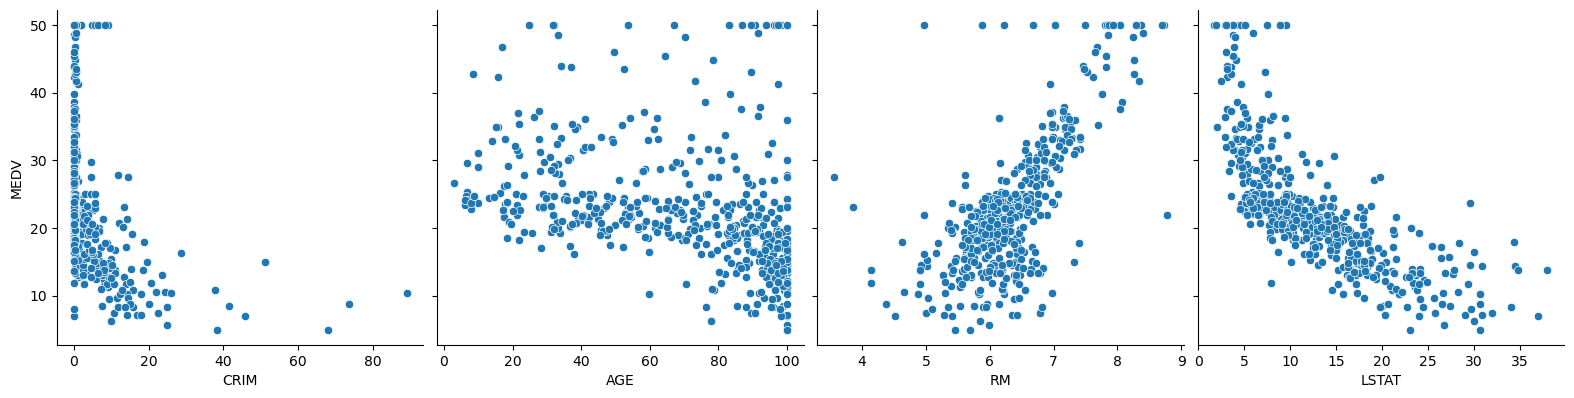

In [59]:
# Visualizing the data for correlation using pairplot

sns.pairplot(housing, x_vars=['CRIM','AGE','RM','LSTAT'],y_vars='MEDV', size=4, aspect=1, kind='scatter')
plt.show()

Plot 1: CRIM vs. MEDV--(Negative correlation) Areas with higher crime rates tend to have lower property values.  
Plot 2: RM vs. MEDV--(Positive correlation) As the Number of rooms increases, the house's value tends to increase as well.  
Plot 3: LSTAT vs. MEDV--(Negative correlation) Higher LSTAT values usually correspond to lower property values.  
Plot 4: AGE vs. MEDV--(Negative correlation) Older houses may have lower values compared to newer ones.

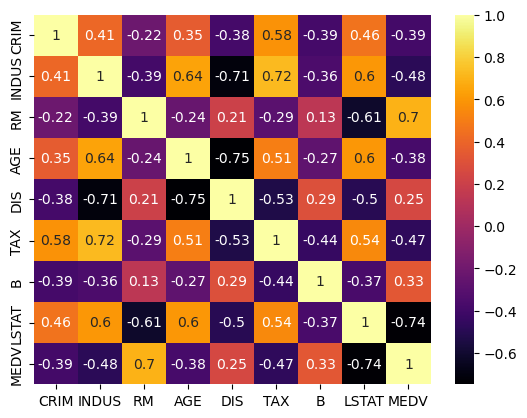

In [60]:
# Visualizing the data using heatmap
sns.heatmap(housing.corr(), cmap="inferno", annot = True)
plt.show()

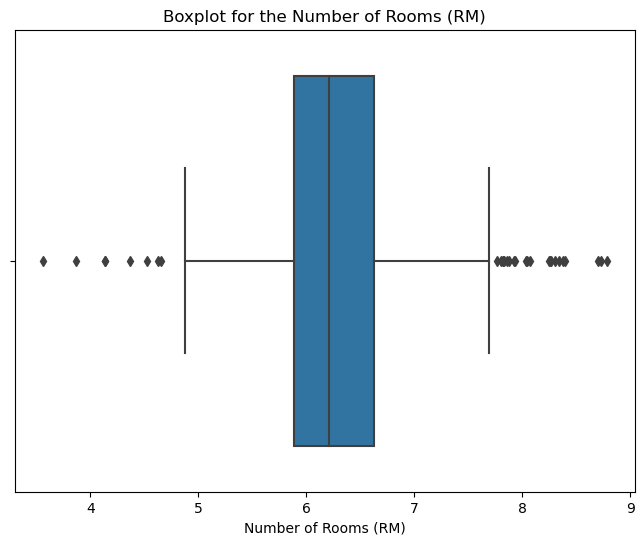

In [61]:
# Visualizing the data for no.of rooms using Boxplot

plt.figure(figsize=(8, 6))
sns.boxplot(x='RM', data=housing)
plt.title('Boxplot for the Number of Rooms (RM)')
plt.xlabel('Number of Rooms (RM)')

plt.show()

The line inside the box represents the median of the 'RM' feature. Between the 25th percentile and the 75th percentile it represents the IQR(Interquartile Range).The upper whisker extends to the maximum value within 1.5 times the IQR above the upper quartile.The lower whisker extends to the minimum value within 1.5 times the IQR below the lower quartile.        

# Model Building

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
# Selecting features (independent variables) and target (dependent variable)

X = housing[['CRIM', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT']]
y = housing['MEDV']

In [64]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Creating a Linear Regression model

model = LinearRegression()

In [66]:
# Train (fit) the model

model.fit(X_train, y_train)

LinearRegression()

In [67]:
# Make predictions on the test set

y_pred = model.predict(X_test)

In [68]:
# Evaluate the model's performance

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [69]:
# Print evaluation metrics

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 32.47647500077581
R-squared (R2): 0.5571416937569489


In [70]:
# Access the model coefficients and intercept

coefficients = model.coef_
intercept = model.intercept_

In [71]:
# Print the coefficients and intercept

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-8.50573875e-02 -6.71265266e-02  5.51732260e+00 -2.69773138e-02
 -1.12632112e+00 -4.80229920e-03  1.23536568e-02 -5.38694653e-01]
Intercept: -0.6175324278453616


EQUATION:   
MEDV = (-8.5)*CRIM+(-6.7)*INDUS+5.5*RM+(-2.7)*AGE+(-1.1)*DIS+(-4.8)*TAX+(1.2)*B+(-5.3)*LSTAT

CRIM (-8.5): A higher CRIM is associated with a lower predicted MEDV.         
INDUS (-6.7): A higher proportion of INDUS is associated with a lower predicted MEDV.        
RM (5.5): Each RM on average per dwelling is associated with a increase in the predicted MEDV.          
AGE (-2.7): An increase in the AGE is linked to a decrease in MEDV.      
DIS (-1.1): An increase in DIS to employment centers is associated with a slight decrease in the predicted MEDV.         
TAX (-4.8): A TAX is associated with a decrease in the predicted MEDV.       
B (1.2): An increase in the proportion of residents of African American descent is associated with increase in MEDV.     
LSTAT (-5.3): An increase in the percentage of LSTAT is linked to a significant decrease in the MEDV.   

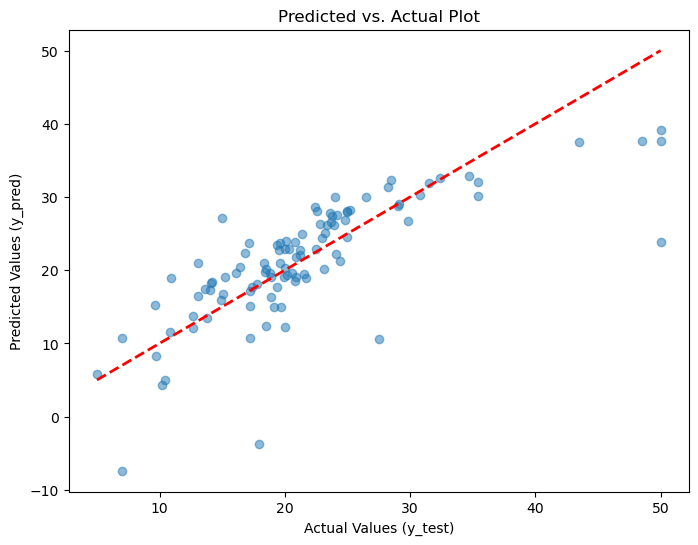

In [72]:
#Predicted vs Actual Plot

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Predicted vs. Actual Plot')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.show()

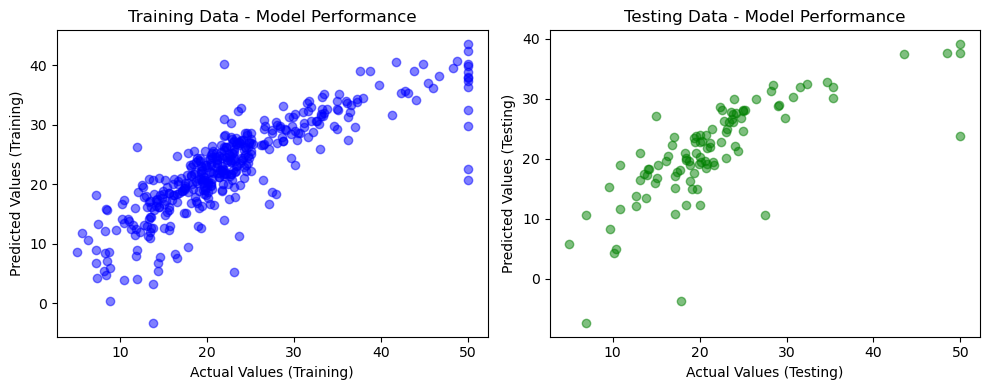

In [73]:
#Model Performance Comparision plot

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_train, model.predict(X_train), color='blue', alpha=0.5)
plt.title('Training Data - Model Performance')
plt.xlabel('Actual Values (Training)')
plt.ylabel('Predicted Values (Training)')

plt.subplot(1, 2, 2)
plt.scatter(y_test, model.predict(X_test), color='green', alpha=0.5)
plt.title('Testing Data - Model Performance')
plt.xlabel('Actual Values (Testing)')
plt.ylabel('Predicted Values (Testing)')
plt.tight_layout()
